<a href="https://colab.research.google.com/github/MiguelJV9/MiguelJV9/blob/main/PROYECTO_FINALipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO SPRINT 14 "PROYECTO FINAL"

## Desripción del proyecto
El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Para complementar el proyecto anexo los links para un GoogleDrive donde podran encontrar mi presentación del proyecto con el titulo "Presentación Proyecto Final":

De igual forma, anexo el link para poder ver el DashBoard en Tableau:
https://public.tableau.com/app/profile/miguel.jimenez4475/viz/ProyectoFinal_17430266523020/Dashboard2?publish=yes

## Preparar los datos para el analisis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

In [ ]:
clients=pd.read_csv('/content/telecom_clients_us.csv')
dataset=pd.read_csv('/content/telecom_dataset_us.csv')

In [ ]:
# Verificar la información faltante y mostrar la suma de valores faltantes por columna
print("Información faltante en 'clients':")
print(clients.isnull().sum())
print("\nInformación faltante en 'dataset':")
print(dataset.isnull().sum())

# Rellenar los espacios vacíos con "N/A"
clients.fillna("N/A", inplace=True)
dataset.fillna("N/A", inplace=True)

# Verificar si se han rellenado los valores faltantes (opcional)
print("\nInformación faltante en 'clients' después de rellenar:")
print(clients.isnull().sum())
print("\nInformación faltante en 'dataset' después de rellenar:")
print(dataset.isnull().sum())

Información faltante en 'clients':
user_id        0
tariff_plan    0
date_start     0
dtype: int64

Información faltante en 'dataset':
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Información faltante en 'clients' después de rellenar:
user_id        0
tariff_plan    0
date_start     0
dtype: int64

Información faltante en 'dataset' después de rellenar:
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


<ipython-input-36-7277797fd93b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.fillna("N/A", inplace=True)


## Verificar información con la que se trabajara

In [ ]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [ ]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,N/A,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [ ]:
# Agrupar por 'user_id' y 'direction', luego contar las llamadas
call_counts = dataset.groupby(['user_id', 'direction'])['direction'].count().reset_index(name='count')

# Pivotar la tabla para tener las llamadas entrantes y salientes como columnas
call_summary = call_counts.pivot(index='user_id', columns='direction', values='count').fillna(0)

# Renombrar las columnas para mayor claridad
call_summary.rename(columns={'in': 'llamadas_recibidas', 'out': 'llamadas_realizadas'}, inplace=True)
call_summary = call_summary.astype(int)
call_summary.reset_index(inplace=True)

# Obtener el número de usuarios únicos
num_usuarios_unicos = call_summary['user_id'].nunique()

# Imprimir el resultado
print(f"Número de usuarios únicos: {num_usuarios_unicos}")

Número de usuarios únicos: 307


In [ ]:
# Contar las repeticiones de cada 'user_id'
repeticiones_user_id = dataset['user_id'].value_counts()

# Mostrar el resultado
print(repeticiones_user_id)

user_id
168187    2580
166658    2107
167497    1405
167626    1311
166916    1308
          ... 
168578       1
167981       1
168013       1
166584       1
166554       1
Name: count, Length: 307, dtype: int64


## Para cada usuario encuentra cuantas llamadas salientes y entrates realizo.

In [ ]:
# Agrupar por 'user_id' y 'direction', luego contar las llamadas
call_counts = dataset.groupby(['user_id', 'direction'])['direction'].count().reset_index(name='count')

# Pivotar la tabla para tener las llamadas entrantes y salientes como columnas
call_summary = call_counts.pivot(index='user_id', columns='direction', values='count').fillna(0)

# Renombrar las columnas para mayor claridad
call_summary.rename(columns={'in': 'llamadas_recibidas', 'out': 'llamadas_realizadas'}, inplace=True)
call_summary = call_summary.astype(int)
call_summary.reset_index(inplace=True)


# Mostrar el DataFrame actualizado
call_summary


direction,user_id,llamadas_recibidas,llamadas_realizadas
0,166377,120,451
1,166391,19,1
2,166392,107,0
3,166399,23,0
4,166405,388,654
...,...,...,...
302,168583,29,0
303,168598,25,0
304,168601,36,41
305,168603,1,7


In [ ]:
# Ordenar por 'llamadas_recibidas' y mostrar los 5 primeros
top_5_recibidas = call_summary.sort_values(by='llamadas_recibidas', ascending=False).head(5)

# Mostrar el resultado
top_5_recibidas

direction,user_id,llamadas_recibidas,llamadas_realizadas
264,168187,1157,1423
271,168252,468,461
80,166983,450,588
68,166916,432,876
4,166405,388,654


In [ ]:
# Ordenar por 'llamadas_realizadas' y mostrar los 5 primeros
top_5_realizadas = call_summary.sort_values(by='llamadas_realizadas', ascending=False).head(5)

# Mostrar el resultado
top_5_realizadas

direction,user_id,llamadas_recibidas,llamadas_realizadas
30,166658,365,1742
264,168187,1157,1423
284,168361,45,1217
175,167626,112,1199
161,167497,309,1096


In [ ]:
# Ordenar por 'llamadas_recibidas' en orden ascendente y mostrar los 5 primeros
top_5_menos_recibidas = call_summary.sort_values(by='llamadas_recibidas', ascending=True).head(5)

# Mostrar el resultado
top_5_menos_recibidas

direction,user_id,llamadas_recibidas,llamadas_realizadas
21,166554,1,0
23,166584,1,0
226,167981,1,0
236,168013,1,0
300,168578,1,0


In [ ]:
# Ordenar por 'llamadas_realizadas' en orden ascendente y mostrar los 5 primeros
top_5_menos_realizadas = call_summary.sort_values(by='llamadas_realizadas', ascending=True).head(5)

# Mostrar el resultado
top_5_menos_realizadas

direction,user_id,llamadas_recibidas,llamadas_realizadas
21,166554,1,0
20,166548,34,0
24,166585,5,0
23,166584,1,0
32,166666,10,0


In [ ]:
# Calcular el promedio de llamadas recibidas
promedio_recibidas = call_summary['llamadas_recibidas'].mean()

# Calcular el promedio de llamadas realizadas
promedio_realizadas = call_summary['llamadas_realizadas'].mean()

# Imprimir los resultados
print(f"Promedio de llamadas recibidas: {promedio_recibidas}")
print(f"Promedio de llamadas realizadas: {promedio_realizadas}")

# Número de usuarios por encima del promedio de llamadas recibidas
por_encima_recibidas = call_summary[call_summary['llamadas_recibidas'] > promedio_recibidas]['user_id'].count()

# Número de usuarios por debajo del promedio de llamadas recibidas
por_debajo_recibidas = call_summary[call_summary['llamadas_recibidas'] < promedio_recibidas]['user_id'].count()

# Imprimir los resultados
print(f"Usuarios por encima del promedio de llamadas recibidas: {por_encima_recibidas}")
print(f"Usuarios por debajo del promedio de llamadas recibidas: {por_debajo_recibidas}")

# Número de usuarios por encima del promedio de llamadas realizadas
por_encima_realizadas = call_summary[call_summary['llamadas_realizadas'] > promedio_realizadas]['user_id'].count()

# Número de usuarios por debajo del promedio de llamadas realizadas
por_debajo_realizadas = call_summary[call_summary['llamadas_realizadas'] < promedio_realizadas]['user_id'].count()

# Imprimir los resultados
print(f"Usuarios por encima del promedio de llamadas realizadas: {por_encima_realizadas}")
print(f"Usuarios por debajo del promedio de llamadas realizadas: {por_debajo_realizadas}")

Promedio de llamadas recibidas: 71.61237785016287
Promedio de llamadas realizadas: 103.9641693811075
Usuarios por encima del promedio de llamadas recibidas: 94
Usuarios por debajo del promedio de llamadas recibidas: 213
Usuarios por encima del promedio de llamadas realizadas: 78
Usuarios por debajo del promedio de llamadas realizadas: 229


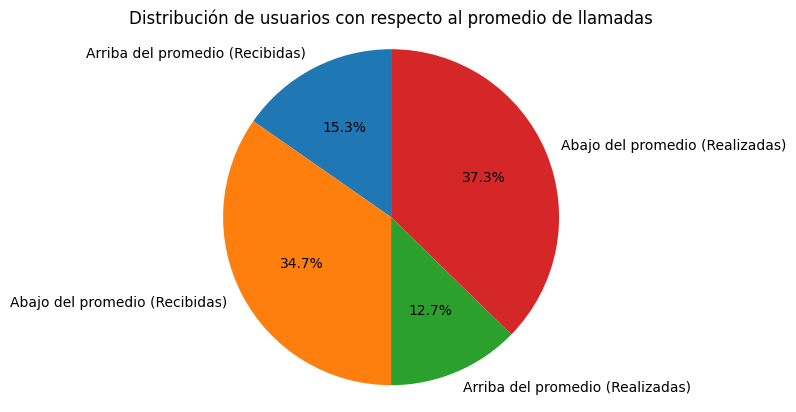

In [ ]:
# Data for the pie chart
labels = ['Arriba del promedio (Recibidas)', 'Abajo del promedio (Recibidas)',
          'Arriba del promedio (Realizadas)', 'Abajo del promedio (Realizadas)']
sizes = [por_encima_recibidas, por_debajo_recibidas,
         por_encima_realizadas, por_debajo_realizadas]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de usuarios con respecto al promedio de llamadas')
plt.show()

## Para cada usuario encuentra cuantas llamadas internas y externas recibio.

In [ ]:
# Agrupar por 'user_id' y aplicar una función lambda para contar las llamadas internas y externas
call_types = dataset.groupby('user_id').agg(
    llamadas_internas=('internal', lambda x: x[x != "N/A"].sum()),  # Exclude 'N/A' before sum
    llamadas_externas=('internal', lambda x: (x[x != "N/A"] == False).sum()) # Count False (external calls) after excluding 'N/A'
).reset_index()


# Mostrar el resultado
call_types

,user_id,llamadas_internas,llamadas_externas
0,166377,36,535
1,166391,6,14
2,166392,1,106
3,166399,0,23
4,166405,23,1017
...,...,...,...
302,168583,0,29
303,168598,0,24
304,168601,1,76
305,168603,0,8


In [ ]:
# Top 5 usuarios con más llamadas internas
top_5_internas = call_types.sort_values(by='llamadas_internas', ascending=False).head(5)

# Top 5 usuarios con más llamadas externas
top_5_externas = call_types.sort_values(by='llamadas_externas', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 usuarios con más llamadas internas:")
print(top_5_internas)

print("\nTop 5 usuarios con más llamadas externas:")
print(top_5_externas)

Top 5 usuarios con más llamadas internas:
     user_id llamadas_internas  llamadas_externas
68    166916               515                790
161   167497               474                931
116   167150               427                729
121   167176               408                340
104   167109               399                449

Top 5 usuarios con más llamadas externas:
     user_id llamadas_internas  llamadas_externas
264   168187               177               2403
30    166658                18               2087
175   167626                13               1285
284   168361                31               1225
4     166405                23               1017


In [ ]:
# Top 5 usuarios con menos llamadas internas
top_5_menos_internas = call_types.sort_values(by='llamadas_internas', ascending=True).head(5)

# Top 5 usuarios con menos llamadas externas
top_5_menos_externas = call_types.sort_values(by='llamadas_externas', ascending=True).head(5)

# Mostrar los resultados
print("Top 5 usuarios con menos llamadas internas:")
print(top_5_menos_internas)

print("\nTop 5 usuarios con menos llamadas externas:")
print(top_5_menos_externas)

Top 5 usuarios con menos llamadas internas:
     user_id llamadas_internas  llamadas_externas
153   167455                 0                 80
254   168097                 0                 41
124   167185                 0                186
253   168093                 0                 13
126   167189                 0                 84

Top 5 usuarios con menos llamadas externas:
     user_id llamadas_internas  llamadas_externas
21    166554              True                  0
23    166584             False                  1
226   167981             False                  1
236   168013             False                  1
113   167139                 1                  1


In [ ]:
# Calcular el promedio de llamadas internas
promedio_internas = call_types['llamadas_internas'].mean()

# Calcular el promedio de llamadas externas
promedio_externas = call_types['llamadas_externas'].mean()

# Imprimir los promedios
print(f"Promedio de llamadas internas: {promedio_internas}")
print(f"Promedio de llamadas externas: {promedio_externas}")

# Número de usuarios por encima y debajo del promedio de llamadas internas
por_encima_internas = call_types[call_types['llamadas_internas'] > promedio_internas]['user_id'].count()
por_debajo_internas = call_types[call_types['llamadas_internas'] < promedio_internas]['user_id'].count()

# Imprimir los resultados para llamadas internas
print(f"\nUsuarios por encima del promedio de llamadas internas: {por_encima_internas}")
print(f"Usuarios por debajo del promedio de llamadas internas: {por_debajo_internas}")

# Número de usuarios por encima y debajo del promedio de llamadas externas
por_encima_externas = call_types[call_types['llamadas_externas'] > promedio_externas]['user_id'].count()
por_debajo_externas = call_types[call_types['llamadas_externas'] < promedio_externas]['user_id'].count()

# Imprimir los resultados para llamadas externas
print(f"\nUsuarios por encima del promedio de llamadas externas: {por_encima_externas}")
print(f"Usuarios por debajo del promedio de llamadas externas: {por_debajo_externas}")

Promedio de llamadas internas: 20.078175895765472
Promedio de llamadas externas: 155.1172638436482

Usuarios por encima del promedio de llamadas internas: 43
Usuarios por debajo del promedio de llamadas internas: 264

Usuarios por encima del promedio de llamadas externas: 86
Usuarios por debajo del promedio de llamadas externas: 221


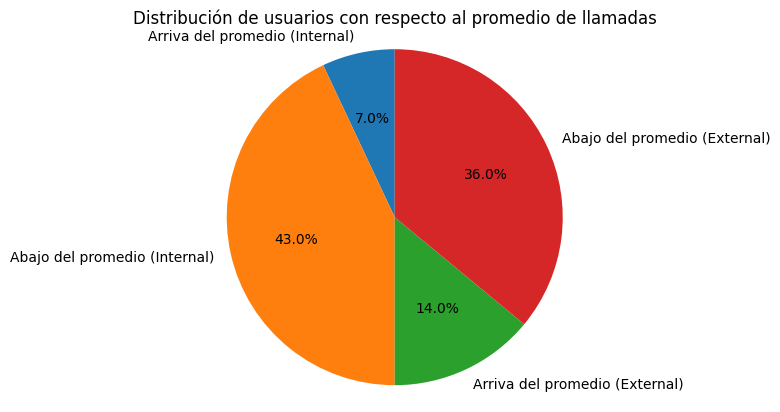

In [ ]:
# Data for the pie chart
labels = ['Arriva del promedio (Internal)', 'Abajo del promedio (Internal)',
          'Arriva del promedio (External)', 'Abajo del promedio (External)']
sizes = [por_encima_internas, por_debajo_internas,
         por_encima_externas, por_debajo_externas]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de usuarios con respecto al promedio de llamadas')
plt.show()

## Para cada usuario encuentra cuantas llamadas perdidas recibio por fecha.

In [ ]:
# Convert 'call_date' to datetime if it's not already
dataset['date'] = pd.to_datetime(dataset['date'])

# Filter for missed calls and group by user and date
missed_calls_by_user_date = dataset[dataset['is_missed_call'] == True].groupby(['user_id', 'date'])['is_missed_call'].count().reset_index(name='missed_calls')

# Display the result
print(missed_calls_by_user_date)

      user_id                      date  missed_calls
0      166377 2019-08-04 00:00:00+03:00             1
1      166377 2019-08-05 00:00:00+03:00             6
2      166377 2019-08-06 00:00:00+03:00             4
3      166377 2019-08-07 00:00:00+03:00             3
4      166377 2019-08-08 00:00:00+03:00             1
...       ...                       ...           ...
8707   168603 2019-11-21 00:00:00+03:00             1
8708   168603 2019-11-28 00:00:00+03:00             1
8709   168606 2019-11-08 00:00:00+03:00             3
8710   168606 2019-11-10 00:00:00+03:00             1
8711   168606 2019-11-19 00:00:00+03:00             1

[8712 rows x 3 columns]


In [ ]:
# Filter for missed calls and group by user and date
missed_calls_by_user_date = dataset[dataset['is_missed_call'] == True].groupby(['user_id', 'date'])['is_missed_call'].count().reset_index(name='missed_calls')

# Group by date and sum missed calls
missed_calls_by_date = missed_calls_by_user_date.groupby('date')['missed_calls'].sum().reset_index()

# Sort by missed calls and get the top 5
top_5_dates = missed_calls_by_date.sort_values(by='missed_calls', ascending=False).head(5)

# Print the top 5 dates with most missed calls
print("Top 5 dates with the most missed calls:")
for index, row in top_5_dates.iterrows():
    print(f"{row['date'].strftime('%Y-%m-%d')}: {row['missed_calls']} missed calls")

Top 5 dates with the most missed calls:
2019-11-25: 493 missed calls
2019-11-19: 488 missed calls
2019-11-28: 479 missed calls
2019-11-21: 478 missed calls
2019-11-20: 471 missed calls


In [ ]:
# Filter for missed calls and group by user and date
missed_calls_by_user_date = dataset[dataset['is_missed_call'] == True].groupby(['user_id', 'date'])['is_missed_call'].count().reset_index(name='missed_calls')

# Group by user_id and sum missed calls to get missed calls per user
missed_calls_by_user = missed_calls_by_user_date.groupby('user_id')['missed_calls'].sum().reset_index()

# Sort by missed calls and get the top 10
top_10_users = missed_calls_by_user.sort_values(by='missed_calls', ascending=False).head(10)

# Print the top 10 users with most missed calls
print("Top 10 Users with Most Missed Calls:")
print(top_10_users)  # Prints the entire DataFrame

Top 10 Users with Most Missed Calls:
     user_id  missed_calls
30    166658           927
263   168187           835
175   167626           675
283   168361           660
161   167497           524
247   168062           516
68    166916           488
116   167150           481
4     166405           457
15    166511           426


## Para cada usuario calcula la duracion promedio de sus llamadas.

In [ ]:
# Group by user_id and calculate the average call duration
average_call_duration_by_user = dataset.groupby('user_id')['total_call_duration'].mean().reset_index(name='average_call_duration')

# Display the result
print(average_call_duration_by_user)

     user_id  average_call_duration
0     166377             765.802102
1     166391              46.450000
2     166392             220.476636
3     166399              36.956522
4     166405            1524.431862
..       ...                    ...
302   168583              76.275862
303   168598             201.840000
304   168601             636.714286
305   168603             163.250000
306   168606             733.500000

[307 rows x 2 columns]


## Encuentra el margen de tiempo entre cada actividad que realiza cada usuario, ya sea de llamada recibida o enviada.

In [ ]:
# Calcular la diferencia de tiempo entre llamadas para cada usuario
dataset['time_diff'] = dataset.groupby('user_id')['date'].diff()

# Calcular el tiempo promedio para llamadas realizadas y recibidas
average_time_diff = dataset.groupby(['user_id', 'direction'])['time_diff'].mean().reset_index()

# Mostrar el resultado
print(average_time_diff)

     user_id direction                 time_diff
0     166377        in 0 days 05:02:31.260504201
1     166377       out 0 days 04:50:33.259423503
2     166391        in           6 days 00:00:00
3     166391       out           0 days 00:00:00
4     166392        in 1 days 02:43:01.132075471
..       ...       ...                       ...
524   168601       out 0 days 08:46:49.756097560
525   168603        in           1 days 00:00:00
526   168603       out           2 days 12:00:00
527   168606        in           1 days 00:00:00
528   168606       out           1 days 00:00:00

[529 rows x 3 columns]


In [ ]:
# Filter for incoming calls and sort by time difference
incoming_calls = dataset[dataset['direction'] == 'in'].sort_values(by=['time_diff'])

# Get the top 5 users with the shortest time to receive a call
top_5_incoming = incoming_calls.groupby('user_id')['time_diff'].min().nsmallest(5)


# Filter for outgoing calls and sort by time difference
outgoing_calls = dataset[dataset['direction'] == 'out'].sort_values(by=['time_diff'])

# Get the top 5 users with the shortest time to make a call
top_5_outgoing = outgoing_calls.groupby('user_id')['time_diff'].min().nsmallest(5)

print("Top 5 users with the shortest time to receive a call:")
print(top_5_incoming)

Top 5 users with the shortest time to receive a call:
user_id
166377   0 days
166391   0 days
166392   0 days
166399   0 days
166405   0 days
Name: time_diff, dtype: timedelta64[ns]


## Realiza una comparación para saber si el plan tarifario presenta algún cambio o constante en el rendimiento de sus llamadas, es decir, realizando una testeo verifica si los usuarios en el plan A, B o C realizan un mejor desempeño por estar en cada grupo.

In [ ]:
# Merge the 'clients' and 'dataset' DataFrames on 'user_id'
merged_df = pd.merge(clients, dataset, on='user_id', how='inner')

# Group by 'tariff_plan' and 'user_id' to calculate call counts
call_counts_by_plan = merged_df.groupby(['tariff_plan', 'user_id'])['direction'].value_counts().unstack(level=1, fill_value=0)

# Rename columns for clarity
call_counts_by_plan.columns = ['user_' + str(col) for col in call_counts_by_plan.columns]

# Transpose the DataFrame to have users as rows and plans as columns
call_counts_by_plan = call_counts_by_plan.T

# Calculate total calls (incoming + outgoing) for each user within each plan
call_counts_by_plan['total_calls'] = call_counts_by_plan.sum(axis=1)

# Get the tariff plan for each user
user_plans = clients.set_index('user_id')['tariff_plan']

# Add the tariff plan information to the call counts DataFrame
call_counts_by_plan['tariff_plan'] = call_counts_by_plan.index.map(lambda x: user_plans.get(int(x.split('_')[1]), 'Unknown'))

# Group by 'tariff_plan' and calculate average total calls
average_calls_by_plan = call_counts_by_plan.groupby('tariff_plan')['total_calls'].mean()

# Display the average total calls for each tariff plan
print("Average Total Calls by Tariff Plan:")
print(average_calls_by_plan)

# Perform statistical tests (e.g., ANOVA) to determine if there are significant differences in call performance between plans
# (This part requires additional statistical analysis using libraries like scipy)

Average Total Calls by Tariff Plan:
tariff_plan
A    438.147059
B    169.142857
C    124.602484
Name: total_calls, dtype: float64


In [ ]:
# Perform ANOVA
# Get total calls for each tariff plan as separate lists or NumPy arrays
plan_a_calls = call_counts_by_plan[call_counts_by_plan['tariff_plan'] == 'A']['total_calls'].values
plan_b_calls = call_counts_by_plan[call_counts_by_plan['tariff_plan'] == 'B']['total_calls'].values
plan_c_calls = call_counts_by_plan[call_counts_by_plan['tariff_plan'] == 'C']['total_calls'].values


# Perform ANOVA
fvalue, pvalue = stats.f_oneway(plan_a_calls, plan_b_calls, plan_c_calls)

print(f"F-value: {fvalue}")
print(f"P-value: {pvalue}")

# Interpret results
alpha = 0.05  # Significance level
if pvalue < alpha:
    print("There is a statistically significant difference in call performance between tariff plans.")
else:
    print("There is no statistically significant difference in call performance between tariff plans.")

F-value: 16.685235508805455
P-value: 1.3320190984697264e-07
There is a statistically significant difference in call performance between tariff plans.


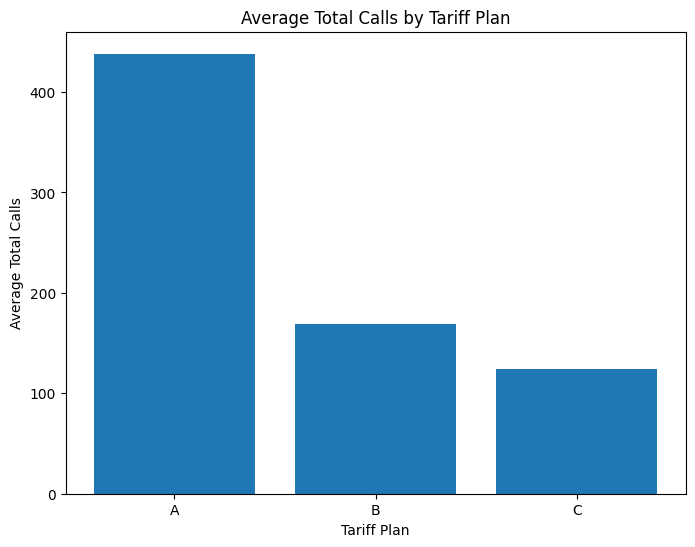

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(average_calls_by_plan.index, average_calls_by_plan.values)
plt.title("Average Total Calls by Tariff Plan")
plt.xlabel("Tariff Plan")
plt.ylabel("Average Total Calls")
plt.xticks(average_calls_by_plan.index)  # Set x-axis ticks to plan names
plt.show()

In [ ]:
# Agrupar por 'user_id' y 'direction', luego contar las llamadas
call_counts = dataset.groupby(['user_id', 'direction'])['direction'].count().reset_index(name='count')

# Pivotar la tabla para tener las llamadas entrantes y salientes como columnas
call_summary = call_counts.pivot(index='user_id', columns='direction', values='count').fillna(0)

# Renombrar las columnas para mayor claridad
call_summary.rename(columns={'in': 'llamadas_recibidas', 'out': 'llamadas_realizadas'}, inplace=True)
call_summary = call_summary.astype(int)
call_summary.reset_index(inplace=True)

# 10 usuarios con menos llamadas realizadas
top_10_menos_realizadas = call_summary.sort_values(by='llamadas_realizadas', ascending=True).head(10)

# 10 usuarios con menos llamadas recibidas
top_10_menos_recibidas = call_summary.sort_values(by='llamadas_recibidas', ascending=True).head(10)

# Mostrar los resultados
print("10 usuarios con menos llamadas realizadas:")
print(top_10_menos_realizadas)

print("\n10 usuarios con menos llamadas recibidas:")
print(top_10_menos_recibidas)

10 usuarios con menos llamadas realizadas:
direction  user_id  llamadas_recibidas  llamadas_realizadas
21          166554                   1                    0
20          166548                  34                    0
24          166585                   5                    0
23          166584                   1                    0
32          166666                  10                    0
278         168303                   4                    0
29          166649                  22                    0
48          166727                  38                    0
41          166697                   9                    0
34          166671                   8                    0

10 usuarios con menos llamadas recibidas:
direction  user_id  llamadas_recibidas  llamadas_realizadas
21          166554                   1                    0
23          166584                   1                    0
226         167981                   1                    0
236         16

In [ ]:
# Definir criterios para operadores eficientes e ineficientes
promedio_recibidas = call_summary['llamadas_recibidas'].mean()
promedio_realizadas = call_summary['llamadas_realizadas'].mean()

# Crear una columna para clasificar a los operadores
call_summary['tipo_operador'] = pd.cut(
    call_summary['llamadas_recibidas'],
    bins=[-float('inf'), promedio_recibidas, float('inf')],
    labels=['Ineficiente', 'Eficiente'],
    right=False  # Incluir el promedio en 'Eficiente'
)

call_summary.loc[call_summary['llamadas_realizadas'] < promedio_realizadas, 'tipo_operador'] = 'Ineficiente'


# Separar los datos de operadores eficientes e ineficientes
eficientes = call_summary[call_summary['tipo_operador'] == 'Eficiente']['llamadas_realizadas']
ineficientes = call_summary[call_summary['tipo_operador'] == 'Ineficiente']['llamadas_realizadas']

# Aplicar la prueba t de Student para comparar las medias de las dos muestras
t_statistic, p_value = stats.ttest_ind(eficientes, ineficientes)

# Imprimir los resultados
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Hay una diferencia estadísticamente significativa entre las llamadas realizadas por operadores eficientes e ineficientes.")
else:
    print("No hay una diferencia estadísticamente significativa entre las llamadas realizadas por operadores eficientes e ineficientes.")

T-statistic: 13.908997831517393
P-value: 2.1370981752785388e-34
Hay una diferencia estadísticamente significativa entre las llamadas realizadas por operadores eficientes e ineficientes.


In [ ]:
# Calcular el total de llamadas para cada usuario
call_summary['total_llamadas'] = call_summary['llamadas_recibidas'] + call_summary['llamadas_realizadas']

# Ordenar el DataFrame por total_llamadas de forma ascendente
call_summary_ordenado = call_summary.sort_values(by='total_llamadas', ascending=True)

# Calcular el total de llamadas para cada usuario
call_summary['total_llamadas'] = call_summary['llamadas_recibidas'] + call_summary['llamadas_realizadas']

# Ordenar el DataFrame por total_llamadas de forma ascendente
call_summary_ordenado = call_summary.sort_values(by='total_llamadas', ascending=True)

# Mostrar los usuarios desde los menos eficientes hasta los más eficientes
print("Usuarios desde los menos eficientes hasta los más eficientes:")
print(call_summary_ordenado[['user_id', 'total_llamadas']])

Usuarios desde los menos eficientes hasta los más eficientes:
direction  user_id  total_llamadas
21          166554               1
23          166584               1
226         167981               1
236         168013               1
300         168578               1
..             ...             ...
68          166916            1308
175         167626            1311
161         167497            1405
30          166658            2107
264         168187            2580

[307 rows x 2 columns]


In [ ]:
from IPython.display import display

# ... (código para crear call_summary y call_summary_ordenado) ...

# Mostrar los usuarios desde los menos eficientes hasta los más eficientes
print("Usuarios desde los menos eficientes hasta los más eficientes:")
display(call_summary_ordenado[['user_id', 'total_llamadas']])

Usuarios desde los menos eficientes hasta los más eficientes:


direction,user_id,total_llamadas
21,166554,1
23,166584,1
226,167981,1
236,168013,1
300,168578,1
...,...,...
68,166916,1308
175,167626,1311
161,167497,1405
30,166658,2107


In [ ]:
from google.colab import data_table

# ... (código para crear call_summary y call_summary_ordenado) ...

# Mostrar los usuarios desde los menos eficientes hasta los más eficientes como una tabla interactiva
print("Usuarios desde los menos eficientes hasta los más eficientes:")
data_table.DataTable(call_summary_ordenado[['user_id', 'total_llamadas']])

Usuarios desde los menos eficientes hasta los más eficientes:


direction,user_id,total_llamadas
21,166554,1
23,166584,1
226,167981,1
236,168013,1
300,168578,1
...,...,...
68,166916,1308
175,167626,1311
161,167497,1405
30,166658,2107


# Conclusiones:

Como podemos observar si hay una diferencia considerable entre los usuarios, desafortunadamente realizando un promedio para medir las llamadas entrantes y salientes en ambos casos estamos por debajo del promedio ya que de los 307 usuarios que tenemos registrado, el 70% esta por debajo del promedio en sus labores, esto nos hace saber que debemos tomar medidas para poder mejorar el desempeño de las actividades. Sin embargo, tambien hay que mencionar que hay algunos usuarios que estan realizando una tarea excepcional y deberiamos tambien recomenpensarlos, ya que tienen mucho mas llamadas entrantes y salientes que el promedio. Finalmente, realizando un test entre los 3 grupos tarifarios podemos observar que el grupo A es el que mejor se comporta respecto a la solicitud de llamadas, debemos prestar atención a este grupo y replicar el modelo de trabajo de ellos.